# Results

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
file_name = "./cme_codestral-latest_classification.csv"

The following dataset contains the answers of the model to the prompts to classify the category of the "Why" and "What" expression/

In [8]:
df = pd.read_csv(file_name)
df.head()

,url,message,api_url,diff,why_category,why_category_expl,what_category,what_category_expl
0,https://github.com/junit-team/junit4/commit/31...,Relicense JUnit from CPL to EPL <enter> EPL i...,https://api.github.com/repos/junit-team/junit4...,"@@ -1,8 +1,8 @@\n JUnit\n \n-Common Public Lic...",Describe Objective,The commit message explains the objective of t...,Summarize Code Object Change,The commit message primarily describes the cha...
1,https://github.com/spring-projects/spring-boot...,Better diagnotics when ESCF subclass breaks wi...,https://api.github.com/repos/spring-projects/s...,"@@ -17,6 +17,7 @@\n package org.springframewor...",Describe Issue,The commit message describes the issue of fail...,Describe Implementation Principle,The commit message explains the technical prin...
2,https://github.com/spring-projects/spring-boot...,Update view of bean types when an override is ...,https://api.github.com/repos/spring-projects/s...,"@@ -76,7 +76,7 @@ final class BeanTypeRegistry...",Describe Issue,The commit message directly elaborates the mot...,Summarize Code Object Change,The commit message summarizes the changes in t...
3,https://github.com/square/okhttp/commit/868ee8...,Drop our one remaining DSS cipher suite. <ent...,https://api.github.com/repos/square/okhttp/com...,"@@ -37,7 +37,7 @@\n */\n public final class C...",Describe Issue,The commit message directly elaborates the mot...,Summarize Code Object Change,The commit message summarizes the code object ...
4,https://github.com/spring-projects/spring-boot...,Fix undertow access_log file name <enter> Und...,https://api.github.com/repos/spring-projects/s...,"@@ -384,7 +384,7 @@ private AccessLogHandler c...",Describe Issue,The commit message directly elaborates the mot...,Summarize Code Object Change,The commit message summarizes the code object ...


Uniformizamos los datos por errores de typeo

In [9]:
df[df['why_category']=='Ilustrate Requirement'] = 'Illustrate Requirement'
df[df['why_category']=='Describe Requirement'] = 'Illustrate Requirement'

In [10]:
df['why_category'].notna().sum()

264

In [11]:
df['why_category'].shape

(271,)

In [12]:
df['why_category'].value_counts()

why_category
Describe Issue            166
Describe Objective         54
Illustrate Requirement     41
Missing Why                 2
Imply necessity             1
Name: count, dtype: int64

In [13]:
manually_labeled = pd.read_excel('../data/maintenance type and expression way.xlsx')

In [14]:
manually_labeled['Why Category'].replace('Illustrate requirement', 'Illustrate Requirement', inplace=True)
manually_labeled['Why Category'].replace('Describe objective', 'Describe Objective', inplace=True)
manually_labeled['Why Category'].replace('Describe issue', 'Describe Issue', inplace=True)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_30432\2068773385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  manually_labeled['Why Category'].replace('Illustrate requirement', 'Illustrate Requirement', inplace=True)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_30432\2068773385.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [15]:
considered_values = ['Describe Issue','Describe Objective', 'Illustrate Requirement', 'Missing Why', 'Imply necessity']

In [16]:
manually_labeled.head()

,Commit ID,URL,Commit Message,Commit Type,Why Codes,Why Initial Category,Why Subcategory,Why Category,What Codes,What Initial Category,What Subcategory,What Category
0,S257,https://github.com/junit-team/junit4/commit/31...,Relicense JUnit from CPL to EPL <enter> EPL i...,Adaptive,EPL is the successor version of the CPL; CPL i...,bug/defect scenario,Describe error scenario,Describe Issue,Relicense JUnit from CPL to EPL,Summarize the key changes,Object of change,Summarize code change
1,S258,https://github.com/spring-projects/spring-boot...,Better diagnotics when ESCF subclass breaks wi...,Corrective,This commit improves the diagnostics so that,Bug/Defect scenario,Describe error scenario,Describe Issue,This commit improves the diagnostics; fail fa...,Summarize of function change,Illustrate function,Illustrate function
2,S259,https://github.com/spring-projects/spring-boot...,Update view of bean types when an override is ...,Corrective,This would lead to incorrect,Bug/Defect scenario,Describe error scenario,Describe Issue,Update view of bean types when an override is ...,summarize code change and illustrate function,Contrast before and after& \nIllustrate function,Illustrate function& Summarize code change
3,S206,https://github.com/square/okhttp/commit/868ee8...,Drop our one remaining DSS cipher suite. <ent...,Perfective,"Tracking Chrome and Firefox, which have also d...",Change based on standards,Conventions and standards,Imply necessity,Drop our one remaining DSS cipher suite.,summarize code change,Object of change,Summarize code change
4,S173,https://github.com/spring-projects/spring-boot...,Fix undertow access_log file name <enter> Und...,Corrective,Undertow 1.3.2 changed the default access log...,Change because the environment change,Runtime or development environment change,Illustrate Requirement,adapt the file name pattern to include the mi...,Describe the status of code object before and ...,Contrast before and after,Summarize code change


In [17]:
considered_values = ['Describe Issue', 'Describe Objective', 'Illustrate Requirement', 'Missing Why', 'Imply necessity']
indexes = manually_labeled[manually_labeled['Why Category'].isin(considered_values)].index
print(len(indexes))

246


In [18]:
df.loc[indexes].shape

(246, 8)

In [19]:
final_index = df.loc[indexes][df.loc[indexes]['why_category'].notna()].index

In [20]:
human_classification = manually_labeled.loc[final_index]['Why Category']
human_classification

0              Describe Issue
1              Describe Issue
2              Describe Issue
3             Imply necessity
4      Illustrate Requirement
                ...          
247           Imply necessity
248               Missing Why
249           Imply necessity
250           Imply necessity
251           Imply necessity
Name: Why Category, Length: 239, dtype: object

In [21]:
codestral_classification = df.loc[final_index]['why_category']

In [22]:

cohen_kappa_score(human_classification, codestral_classification)

0.1062636335306949

In [23]:

confusion_matrix = confusion_matrix(human_classification, codestral_classification)

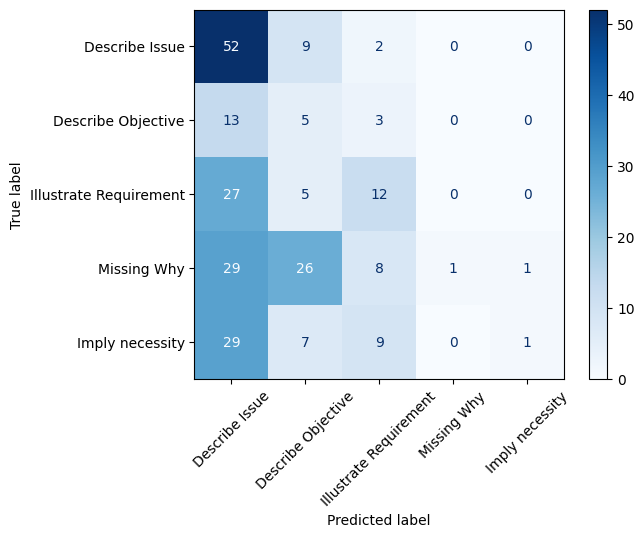

In [24]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = considered_values)
cm_display.plot(cmap='Blues')
plt.set_cmap('Reds')
plt.xticks(rotation=45)
plt.show()

In [25]:
manually_labeled['Why Category'].value_counts()

Why Category
Describe Issue                              66
Imply necessity                             66
Missing Why                                 49
Illustrate Requirement                      44
Describe Objective                          21
Issue Link                                  13
PR Link                                      6
Describe issue & Imply necessary             3
Illustrate requirement & Imply necessary     2
Describe issue & Describe objective          1
Name: count, dtype: int64

In [26]:
df['what_category'].value_counts()

what_category
Summarize Code Object Change         151
Describe Implementation Principle     70
Illustrate Requirement                31
Illustrate Function                   10
Missing What                           1
Name: count, dtype: int64